## CLIM 680 Assignment 3
### Douglas Nedza

Calculate and plot the composite maps for a chosen index.

The data I am using for this analysis is from a CMIP5 pre-industrial run.  Due to the independence of this dataset with observations, a climate index will be calculated from the chosen dataset.

## Import necessary Python packages and Load the Data

In [1]:
import numpy as np;
import xarray as xr;
import matplotlib.pyplot as plt;

import cartopy.crs as ccrs;
import cartopy.mpl.ticker as cticker;
from cartopy.util import add_cyclic_point;

In [2]:
## Read dataset into notebook.  
##Calculate the annual means simultaneously to remove the dominant effect of the seasonal cycle. This also decreases the amount of data in memory.  
sst_path = '/shared/cmip5/data/piControl/ocean/mon/Omon/tos/NOAA-GFDL.GFDL-CM3/r1i1p1/';
atmos_path = '/shared/cmip5/data/piControl/atmos/mon/Amon/';
ts_path = atmos_path + '/ts/NOAA-GFDL.GFDL-CM3/r1i1p1/';
pr_path = atmos_path + '/pr/NOAA-GFDL.GFDL-CM3/r1i1p1/';
sst_file = 'tos_Omon_GFDL-CM3_piControl_r1i1p1_*.nc';
ts_file = 'ts_Amon_GFDL-CM3_piControl_r1i1p1_*.nc';
pr_file =  'pr_Amon_GFDL-CM3_piControl_r1i1p1_*.nc';
sst_ds = xr.open_mfdataset( ( sst_path + sst_file ), concat_dim = 'time' ).groupby( 'time.year' ).mean( dim = 'time' );
ts_ds = xr.open_mfdataset( ( ts_path + ts_file ), concat_dim = 'time' ).groupby( 'time.year' ).mean( dim = 'time' );
pr_ds = xr.open_mfdataset( ( pr_path + pr_file ), concat_dim = 'time' ).groupby( 'time.year' ).mean( dim = 'time' );
##Convert precipitation from mm/s to mm/day
pr_ds['pr'] = pr_ds['pr'] * 8.64 * ( 10 ** 4 );
sst_ds
## Note that there is no units attribute for this file.

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/coding/times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 200, rlon: 360, vertices: 4, year: 500)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * rlon          (rlon) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * rlat          (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
  * year          (year) int64 1 2 3 4 5 6 7 8 ... 494 495 496 497 498 499 500
Data variables:
    average_DT    (year) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    tos           (year, rlat, rlon) float32 dask.array<chunksize=(1, 200, 360), meta=np.ndarray>
    lat_vertices  (year, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 200, 360, 4), meta=np.ndarray>
    lon_vertices  (year, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 200, 360, 4), meta=np.ndarray>

In [3]:
##Shift the longitude of the ocean dataset to be consistent with the atmospheric datasets
new_rlon = ( sst_ds['rlon'] + 360 ) % 360;
sst_ds = sst_ds.assign_coords( rlon = new_rlon );
sst_ds = sst_ds.sortby( sst_ds['rlon'] );
sst_ds

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 200, rlon: 360, vertices: 4, year: 500)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * rlon          (rlon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * rlat          (rlat) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(200, 360), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
  * year          (year) int64 1 2 3 4 5 6 7 8 ... 494 495 496 497 498 499 500
Data variables:
    average_DT    (year) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    tos           (year, rlat, rlon) float32 dask.array<chunksize=(1, 200, 360), meta=np.ndarray>
    lat_vertices  (year, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 200, 360, 4), meta=np.ndarray>
    lon_vertices  (year, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 200, 360, 4), meta=np.ndarray>

## Calculate an Index of the Atlantic Multidecadal Oscillation, the averaged SST over the North Atlantic ocean.

In [4]:
sst_na = sst_ds.sel( rlat = slice( 0, 60 ),
                         rlon = slice( 360-75, 360 ) );
sst_na

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 74, rlon: 75, vertices: 4, year: 500)
Coordinates:
  * bnds          (bnds) float64 1.0 2.0
  * rlon          (rlon) float64 285.5 286.5 287.5 288.5 ... 357.5 358.5 359.5
  * rlat          (rlat) float64 0.1667 0.5021 0.8435 1.195 ... 57.5 58.5 59.5
    lat           (rlat, rlon) float32 dask.array<chunksize=(74, 75), meta=np.ndarray>
    lon           (rlat, rlon) float32 dask.array<chunksize=(74, 75), meta=np.ndarray>
  * vertices      (vertices) int32 0 1 2 3
  * year          (year) int64 1 2 3 4 5 6 7 8 ... 494 495 496 497 498 499 500
Data variables:
    average_DT    (year) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
    tos           (year, rlat, rlon) float32 dask.array<chunksize=(1, 74, 75), meta=np.ndarray>
    lat_vertices  (year, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 74, 75, 4), meta=np.ndarray>
    lon_vertices  (year, rlat, rlon, vertices) float64 dask.array<chunksize=(1, 74, 75, 4), meta=np.ndarray>

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


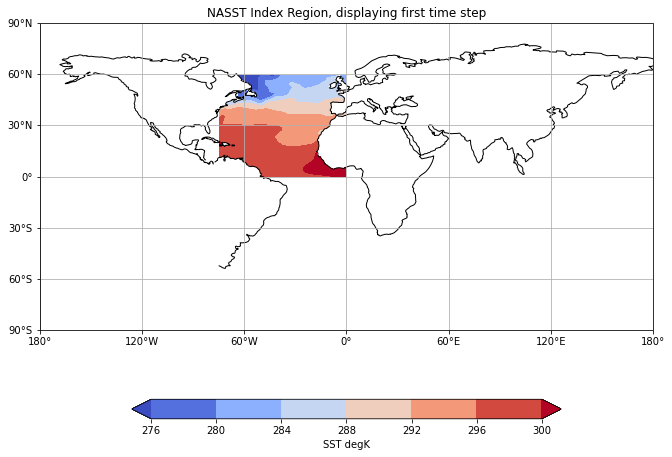

In [6]:
##Make the figure larger
fig = plt.figure( figsize = ( 11, 8.5 ) );

#Set the axes using the specified map projection
ax = plt.axes( projection = ccrs.PlateCarree() );

#Make a filled contour plot
cs = ax.contourf( sst_na['rlon'],
                 sst_na['rlat'],
                 sst_na['tos'][0,:,:,],
                 transform = ccrs.PlateCarree(),
                 cmap = 'coolwarm', extend = 'both' );

#Add coastlines
ax.coastlines();

#Add gridlines
ax.gridlines();

##Define the xticks for longitude
ax.set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
lon_formatter = cticker.LongitudeFormatter();
ax.xaxis.set_major_formatter( lon_formatter );

##Define the yticks for latitude
ax.set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
lat_formatter = cticker.LatitudeFormatter();
ax.yaxis.set_major_formatter( lat_formatter );

#Add colorbar
cbar = plt.colorbar( cs, shrink = 0.7,
                    orientation = 'horizontal',
                    label = 'SST degK' );

#Add title.  Note that using .groupby().mean() removes the attributes that describe the dataset
plt.title( 'NASST Index Region, displaying first time step' );

<xarray.DataArray 'tos' (year: 500)>
dask.array<mean_agg-aggregate, shape=(500,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 1 2 3 4 5 6 7 8 9 ... 493 494 495 496 497 498 499 500


/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


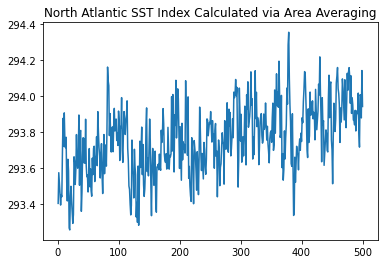

In [7]:
nasst_ind = sst_na['tos'].mean( dim = ( 'rlat', 'rlon' ) );
print( nasst_ind );
plt.plot( nasst_ind['year'], nasst_ind );
plt.title( 'North Atlantic SST Index Calculated via Area Averaging' );

### Center the Time Series

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0, 0.5, 'NASST Anomaly degC')

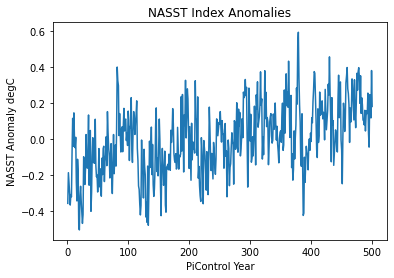

In [8]:
nasst_mean = nasst_ind.mean();
nasst_ind = nasst_ind - nasst_mean;
plt.plot( nasst_ind['year'], nasst_ind );
plt.title( 'NASST Index Anomalies' );
plt.xlabel( 'PiControl Year' );
plt.ylabel( 'NASST Anomaly degC' )

## Determine the Composite maps of Precipitation and Surface Temperature relative to the calculated AMO index

Based on a visual inspection of the variability of the Area Averaged NASST Index, thresholds are chosen at +- 0.2 degrees celsius

In [9]:
##By omitting return values for the where() function, Nans will be returned where the condition is not met
pos_nasst = nasst_ind.where( nasst_ind >= 0.2 );
neg_nasst = nasst_ind.where( nasst_ind <= -0.2 );
neutral = nasst_ind.where( np.logical_and( nasst_ind > -0.2, nasst_ind < 0.2 ) );
##The 'and' command will attempt to find a single true/false value

In [10]:
print( 'Positive NASST: ', pos_nasst.count( dim = 'year' ).values );
print( 'Negative NASST: ', neg_nasst.count( dim = 'year' ).values );
print( 'Neutral: ', neutral.count( dim = 'year' ).values );

counts = [pos_nasst.count( dim = 'year' ).values, 
         neg_nasst.count( dim = 'year' ).values, 
         neutral.count( dim = 'year' ).values ];
print( counts );

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Positive NASST:  77


/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Negative NASST:  69


/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Neutral:  354


/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[array(77), array(69), array(354)]


/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarni

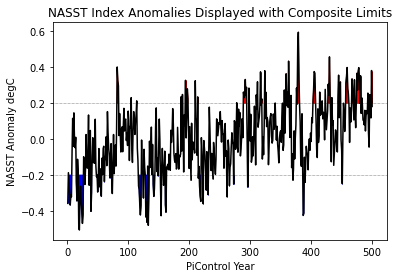

In [11]:
plt.plot( nasst_ind['year'], nasst_ind, 'k' );
plt.fill_between( nasst_ind['year'], 0.2, pos_nasst, color = 'red' );
plt.fill_between( nasst_ind['year'], neg_nasst, -0.2, color = 'blue' );
plt.axhline( 0.2, color = 'black', linewidth = 0.5, linestyle = 'dotted' );
plt.axhline( -0.2, color = 'black', linewidth = 0.5, linestyle = 'dotted' );
plt.title( 'NASST Index Anomalies Displayed with Composite Limits' );
plt.ylabel( 'NASST Anomaly degC' );
plt.xlabel( 'PiControl Year' );

## Surface Temperature

In [12]:
##Create a climatology to find the precipitation anomalies
ts_climo = ts_ds.mean( dim = 'year' );
ts_anoms = ts_ds - ts_climo;
ts_anoms

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 90, lon: 144, year: 500)
Coordinates:
  * lat         (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * year        (year) int64 1 2 3 4 5 6 7 8 ... 493 494 495 496 497 498 499 500
Dimensions without coordinates: bnds
Data variables:
    lat_bnds    (year, lat, bnds) float64 dask.array<chunksize=(1, 90, 2), meta=np.ndarray>
    lon_bnds    (year, lon, bnds) float64 dask.array<chunksize=(1, 144, 2), meta=np.ndarray>
    ts          (year, lat, lon) float32 dask.array<chunksize=(1, 90, 144), meta=np.ndarray>
    average_DT  (year) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>

In [13]:
pos_ts = ts_anoms.sel( year = pos_nasst.dropna( dim = 'year' )['year'] ).mean( dim = 'year' );
neg_ts = ts_anoms.sel( year = neg_nasst.dropna( dim = 'year' )['year'] ).mean( dim = 'year' );
neutral_ts = ts_anoms.sel( year = neutral.dropna( dim = 'year' )['year'] ).mean( dim = 'year' );

comp_ts = [pos_ts, neg_ts, neutral_ts];
comp_ts                      

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[<xarray.Dataset>
 Dimensions:     (bnds: 2, lat: 90, lon: 144)
 Coordinates:
   * lat         (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
   * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
 Dimensions without coordinates: bnds
 Data variables:
     lat_bnds    (lat, bnds) float64 dask.array<chunksize=(90, 2), meta=np.ndarray>
     lon_bnds    (lon, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
     ts          (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
     average_DT  timedelta64[ns] dask.array<chunksize=(), meta=np.ndarray>,
 <xarray.Dataset>
 Dimensions:     (bnds: 2, lat: 90, lon: 144)
 Coordinates:
   * lat         (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
   * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
 Dimensions without coordinates: bnds
 Data variables:
     lat_bnds    (lat, bnds) float64 dask.array<chunksize=(90, 2), meta=np.ndarray>
    

Text(0.5, 0.98, 'Composite Surface Temperature Anomalies during NASST Variations')

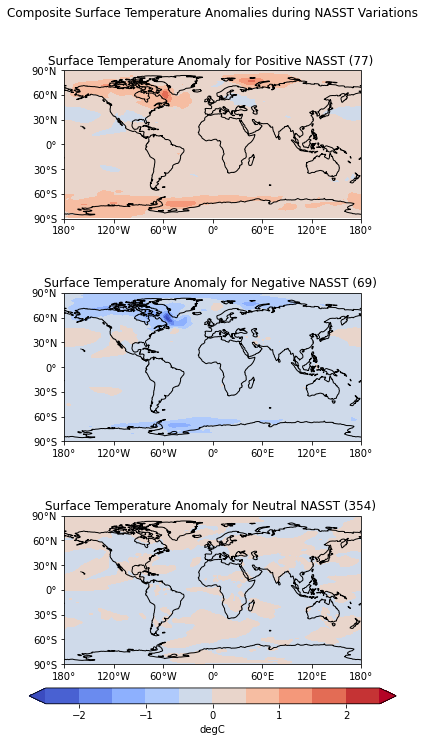

In [14]:
labels = ['Positive NASST', 'Negative NASST', 'Neutral NASST'];
clevs = np.arange( -2.5, 3.0, 0.5 );

## Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots( nrows = 3, ncols = 1,
                       subplot_kw = {'projection': ccrs.PlateCarree() },
                       figsize = (8.5, 11) );
## axs is a 2 dimensional array of 'GeoAxes'.
##We will flatten this into a 1D array
axs = axs.flatten();

##Loop over each of the conditions and plot
for i, nasst in enumerate( comp_ts ):
    ##Select the comp
    data = comp_ts[i]['ts'];
    ##Add the cyclic point
    data,lons = add_cyclic_point( data, coord = comp_ts[i]['lon'] );
    ##Create the contour plot
    cs = axs[i].contourf( lons, comp_ts[i]['lat'], data, clevs,
                        transform = ccrs.PlateCarree(),
                        cmap = 'coolwarm', extend = 'both' );
    ##Longitude labels 
    axs[i].set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
    lon_formatter = cticker.LongitudeFormatter();
    axs[i].xaxis.set_major_formatter( lon_formatter );
    ##Latitude labels
    axs[i].set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
    lat_formatter = cticker.LatitudeFormatter();
    axs[i].yaxis.set_major_formatter( lat_formatter );
    ##Title each subplot with the name of the composite
    axs[i].set_title( 'Surface Temperature Anomaly for ' + labels[i] + ' (' + str(counts[i]) + ') ' );
    ##Draw the coastlines for each subplot
    axs[i].coastlines();
    
    
##Adjust the location of the subplots to make room for colorbar
fig.subplots_adjust( bottom = 0.15, top = 0.9, left = 0.05, right = 0.95,
                   wspace = 0.1, hspace = 0.5 );
##Add a colorbar axis
cbar_ax = fig.add_axes( [0.2, 0.1, 0.6, 0.02] );
cbar = fig.colorbar( cs, cax = cbar_ax, orientation = 'horizontal', label = 'degC' );

plt.suptitle( 'Composite Surface Temperature Anomalies during NASST Variations')

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Text(0.5, 1.0, 'Scatter Plot of Labrador Sea Surface Temperature')

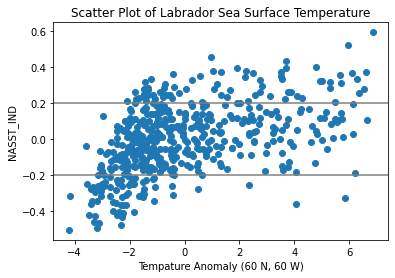

In [15]:
##Select out the point for the high composite value
pt_ts = ts_anoms.sel( lat = 60, lon = 360-60, method = 'nearest' );
plt.scatter( pt_ts['ts'], nasst_ind );
plt.xlabel( 'Tempature Anomaly (60 N, 60 W)' );
plt.ylabel( 'NASST_IND' );

plt.axhline( 0.2, color = 'gray' );
plt.axhline( -0.2, color = 'gray' );
plt.title( 'Scatter Plot of Labrador Sea Surface Temperature')

In [16]:
##Create a climatology to find the precipitation anomalies
pr_climo = pr_ds.mean( dim = 'year' );
pr_anoms = pr_ds - pr_climo;
pr_anoms

<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 90, lon: 144, year: 500)
Coordinates:
  * lat         (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * year        (year) int64 1 2 3 4 5 6 7 8 ... 493 494 495 496 497 498 499 500
Dimensions without coordinates: bnds
Data variables:
    lat_bnds    (year, lat, bnds) float64 dask.array<chunksize=(1, 90, 2), meta=np.ndarray>
    lon_bnds    (year, lon, bnds) float64 dask.array<chunksize=(1, 144, 2), meta=np.ndarray>
    pr          (year, lat, lon) float32 dask.array<chunksize=(1, 90, 144), meta=np.ndarray>
    average_DT  (year) timedelta64[ns] dask.array<chunksize=(1,), meta=np.ndarray>

In [17]:
pos_pr = pr_anoms.sel( year = pos_nasst.dropna( dim = 'year' )['year'] ).mean( dim = 'year' );
neg_pr = pr_anoms.sel( year = neg_nasst.dropna( dim = 'year' )['year'] ).mean( dim = 'year' );
neutral_pr = pr_anoms.sel( year = neutral.dropna( dim = 'year' )['year'] ).mean( dim = 'year' );

comp_pr = [pos_pr, neg_pr, neutral_pr];
print( comp_pr );
                             

/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/homes/dnedza/.conda/envs/clim680/lib/python3.8/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[<xarray.Dataset>
Dimensions:     (bnds: 2, lat: 90, lon: 144)
Coordinates:
  * lat         (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    lat_bnds    (lat, bnds) float64 dask.array<chunksize=(90, 2), meta=np.ndarray>
    lon_bnds    (lon, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
    pr          (lat, lon) float32 dask.array<chunksize=(90, 144), meta=np.ndarray>
    average_DT  timedelta64[ns] dask.array<chunksize=(), meta=np.ndarray>, <xarray.Dataset>
Dimensions:     (bnds: 2, lat: 90, lon: 144)
Coordinates:
  * lat         (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon         (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    lat_bnds    (lat, bnds) float64 dask.array<chunksize=(90, 2), meta=np.ndarray>
    lon_bnds    (lon, 

Text(0.5, 0.98, 'Composite Precipitation Anomalies during Variations in NASST')

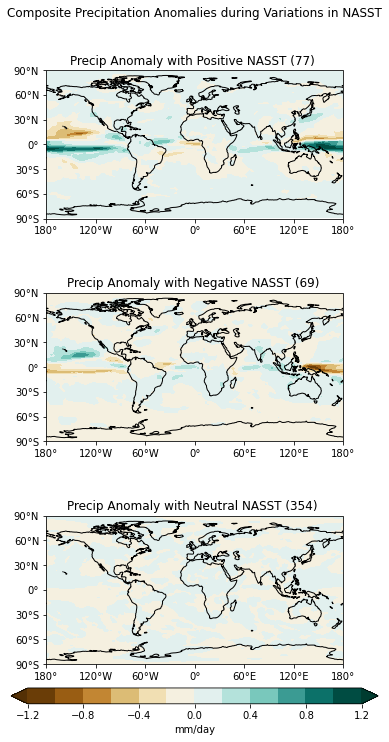

In [18]:
labels = ['Positive NASST', 'Negative NASST', 'Neutral NASST'];
clevs = np.arange( -1.2, 1.4, 0.2 );

## Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots( nrows = 3, ncols = 1,
                       subplot_kw = {'projection': ccrs.PlateCarree() },
                       figsize = (8.5, 11) );
## axs is a 2 dimensional array of 'GeoAxes'.
##We will flatten this into a 1D array
axs = axs.flatten();

##Loop over each of the conditions and plot
for i, enso in enumerate( comp_pr ):
    ##Select the comp
    data = comp_pr[i]['pr'];
    ##Add the cyclic point
    data,lons = add_cyclic_point( data, coord = comp_pr[i]['lon'] );
    ##Create the contour plot
    cs = axs[i].contourf( lons, comp_pr[i]['lat'], data, clevs,
                        transform = ccrs.PlateCarree(),
                        cmap = 'BrBG', extend = 'both' );
    ##Longitude labels 
    axs[i].set_xticks( np.arange( -180, 181, 60 ), crs = ccrs.PlateCarree() );
    lon_formatter = cticker.LongitudeFormatter();
    axs[i].xaxis.set_major_formatter( lon_formatter );
    ##Latitude labels
    axs[i].set_yticks( np.arange( -90, 91, 30 ), crs = ccrs.PlateCarree() );
    lat_formatter = cticker.LatitudeFormatter();
    axs[i].yaxis.set_major_formatter( lat_formatter );
    ##Title each subplot with the name of the composite
    axs[i].set_title( 'Precip Anomaly with ' + labels[i] + ' (' + str(counts[i]) + ') ' );
    ##Draw the coastlines for each subplot
    axs[i].coastlines();
    
    
##Adjust the location of the subplots to make room for colorbar
fig.subplots_adjust( bottom = 0.15, top = 0.9, left = 0.05, right = 0.95,
                   wspace = 0.1, hspace = 0.5 );
##Add a colorbar axis
cbar_ax = fig.add_axes( [0.2, 0.1, 0.6, 0.02] );
cbar = fig.colorbar( cs, cax = cbar_ax, orientation = 'horizontal', label = 'mm/day' );

plt.suptitle( 'Composite Precipitation Anomalies during Variations in NASST')